<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Exercise 3
:</span> Data Cleaning and Visualization</h1>
<hr>
Welcome to the workbook for <span style="color:royalblue">Exercise 3: Data Cleaning and Visualization</span>! 

Remember, **better data beats better algorithms**.



# Analyzing Gun Deaths in the US: 2012-2014


### Data Schema
- **year**: the year in which the fatality occurred.
- **month**: the month in which the fatality occurred.
- **intent**: the intent of the perpetrator of the crime. This can be Suicide, Accidental, NA, Homicide, or Undetermined.
- **police**: whether a police officer was involved with the shooting. Either 0 (false) or 1 (true).
- **sex**: the gender of the victim. Either M or F.
- **age**: the age of the victim.
- **race**: the race of the victim. Either Asian/Pacific Islander, Native American/Native Alaskan, Black, Hispanic, or White.
- **hispanic**: a code indicating the Hispanic origin of the victim.
- **place**: where the shooting occurred. Has several categories, which you're encouraged to explore on your own.
- **education**: educational status of the victim. Can be one of the following:
    * 1: Less than High School
    * 2: Graduated from High School or equivalent
    * 3: Some College
    * 4: At least graduated from College
    * 5: Not available

### First, let's import libraries

In [2]:
# import numpy
import numpy as np
# import pandas
import pandas as pd
# import matplotlib.pyplot
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns

### Then, load the dataset

In [3]:
df = pd.read_csv('../../data/guns.csv')

# 1. Basic information

First, always look at basic information about the dataset. 
<br>

**Display the dimensions of the dataset.**

In [6]:
df.shape

(100798, 10)

**Print the data types**

In [8]:
df.dtypes

year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race          object
hispanic       int64
place         object
education    float64
dtype: object

**Filter and display only df.dtypes that are 'object'**

In [23]:
df.dtypes[df.dtypes == 'object']


intent    object
sex       object
race      object
place     object
dtype: object

**Diplay head**

In [28]:
df.select_dtypes(include= ['object'])

,intent,sex,race,place
0,Suicide,M,Asian/Pacific Islander,Home
1,Suicide,F,White,Street
2,Suicide,M,White,Other specified
3,Suicide,M,White,Home
4,Suicide,M,White,Other specified
5,Suicide,M,Native American/Native Alaskan,Home
6,Undetermined,M,White,Home
7,Suicide,M,Native American/Native Alaskan,Home
8,accident,M,White,Other specified
9,Suicide,M,Black,Home


<br>

# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.

**Plot histogram grid**

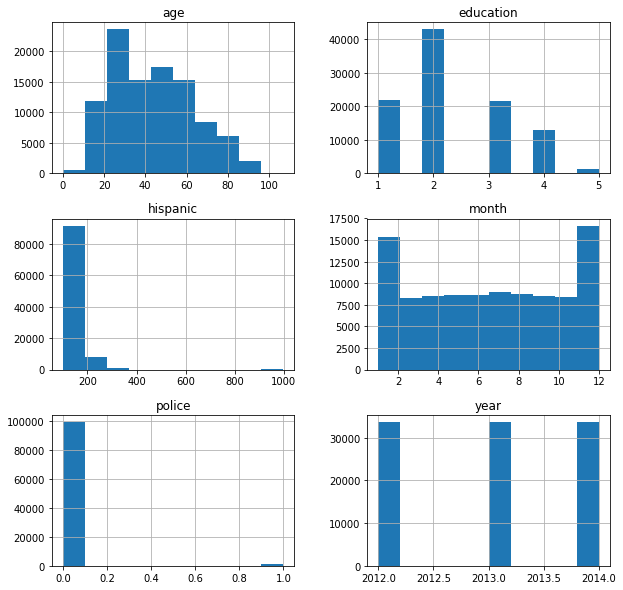

In [31]:
df.hist(figsize=(10,10))
plt.show()

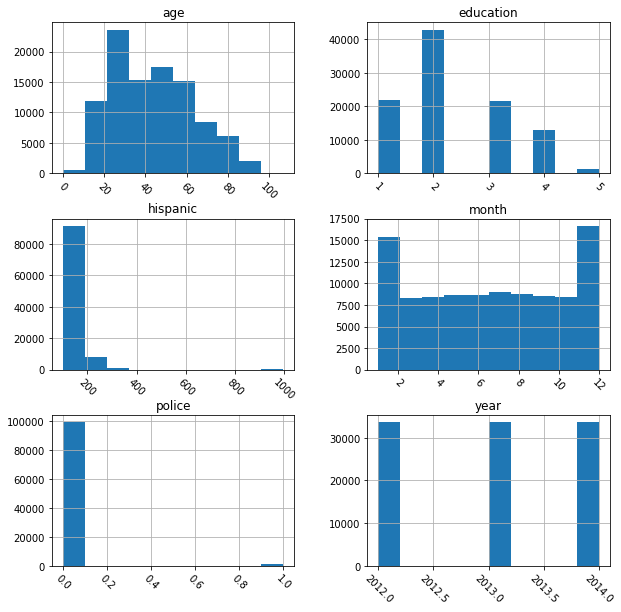

In [32]:
df.hist(xrot=-45, figsize=(10,10))
plt.show()

**Summarize numerical features**

In [39]:
df.select_dtypes(exclude= ['object']).describe().T

,count,mean,std,min,25%,50%,75%,max
year,100798.0,2013.000357,0.816278,2012.0,2012.0,2013.0,2014.0,2014.0
month,100798.0,6.567601,3.405609,1.0,4.0,7.0,9.0,12.0
police,100798.0,0.013909,0.117114,0.0,0.0,0.0,0.0,1.0
age,100780.0,43.857601,19.496181,0.0,27.0,42.0,58.0,107.0
hispanic,100798.0,114.179607,61.595734,100.0,100.0,100.0,100.0,998.0
education,100745.0,2.296352,0.990105,1.0,2.0,2.0,3.0,5.0


<br>

# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.
<br>

**Display summary statistics for categorical features.**

In [41]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
intent,100797,7,Suicide,62138
sex,100798,2,M,86349
race,100798,6,White,65585
place,99414,10,Home,60486


**Summarize categorical features**

**Plot bar plot for each categorical feature**

intent


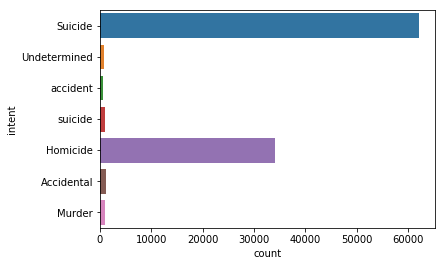

sex


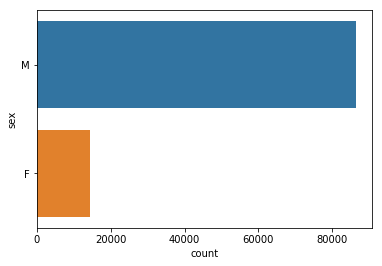

race


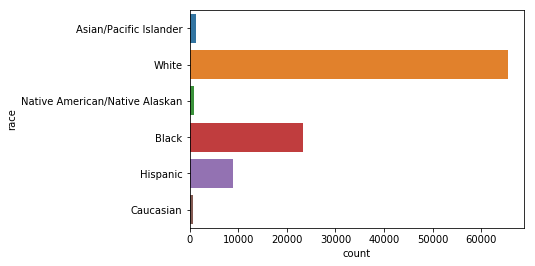

place


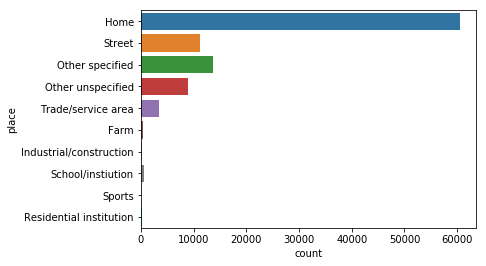

In [43]:
for series in df.select_dtypes(include=['object']):
    print(series)
    sns.countplot( y=series , data=df)
    plt.show()

<br>

# 4. Corrolations

Next, let's take a look at the Correlations for our numerical features.
<br>

**Calculate correlations between numeric features**

In [45]:
corr = df.corr()
corr

,year,month,police,age,hispanic,education
year,1.000000,0.006465,-0.000778,0.016665,0.000526,0.010421
month,0.006465,1.000000,-0.002532,-0.008896,0.006780,-0.001472
police,-0.000778,-0.002532,1.000000,-0.047558,0.026558,-0.028198
age,0.016665,-0.008896,-0.047558,1.000000,-0.090944,0.236691
hispanic,0.000526,0.006780,0.026558,-0.090944,1.000000,-0.010189
education,0.010421,-0.001472,-0.028198,0.236691,-0.010189,1.000000


**Make the figsize 10 x 8**

In [46]:
plt.figure(figsize=(10,8))


<Figure size 504x432 with 0 Axes>

<Figure size 504x432 with 0 Axes>

**Generate a mask for the upper triangle**

In [51]:
# bool_mask = np.zeros_like(corr, dtype=np.bool)
# bool_mask[np.triu_indices_from(mask)] = True

**Plot heatmap of annotated correlations**

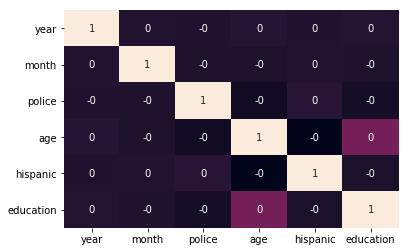

In [52]:
sns.heatmap(corr, annot=True, fmt='.0f', cbar=False)
plt.show()

**Remove Color Bar**

<br>

# 5. Data Cleaning

## A. Drop unwanted observations

The first task is to drop data that needs no discrimination...exact duplicates.

<br>


**Drop duplicates**

In [53]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(100798, 10)
(63669, 10)


<br>

## B. Fix structural errors

The next bucket under data cleaning involves fixing structural errors. 
This involves checking for typos, mislabeled classes or inconsistent capitalization.
<br>

## <code style="color:steelblue">'police'</code>

**Display the class distribution for the <code style="color:steelblue">'police'</code> feature.**

**Hint**: Class Distribution means the distribution of "unique" values present in any given column of a Pandas DataFrame... what methods can you rememebr that do this?

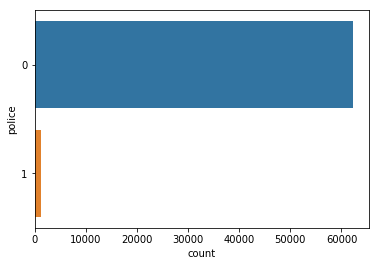

In [62]:
sns.countplot(data=df, y='police')
plt.show()

In [67]:
df['police'].value_counts(dropna=False)

0    62337
1     1332
Name: police, dtype: int64

In [71]:
df['police'].unique()

TypeError: unique() got an unexpected keyword argument 'dropna'

**Fill missing values in "police" variable (aka NaNs) with 0s!**

In [73]:
df['police'].fillna(0)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
100746    0
100749    0
100750    0
100751    0
100752    0
100753    0
100759    0
100760    0
100761    0
100762    0
100765    0
100766    0
100767    0
100768    0
100769    0
100770    1
100771    0
100776    0
100778    0
100780    0
100782    0
100784    0
100785    0
100786    0
100787    0
100788    0
100789    0
100790    0
100796    0
100797    0
Name: police, Length: 63669, dtype: int64

In [74]:
df['police'].value_counts(dropna=False)

0    62337
1     1332
Name: police, dtype: int64

**Re-Display the class distribution for the <code style="color:steelblue">'police'</code> feature.**

Does it look like a marker variable should?

<br>

## <code style="color:steelblue">'intent'</code>

**Display the class distribution for the <code style="color:steelblue">'intent'</code> feature.**

In [87]:
df['intent'].value_counts()

Suicide         34863
Homicide        25439
Accidental       1604
Homice            958
Undetermined      804
Name: intent, dtype: int64

**'Murder' should be Homicide**

In [80]:
df['intent'] = df['intent'].replace("Murder", "Homice")

**'Accident' should be Accidental**

In [84]:
df['intent'] = df['intent'].replace("accident", "Accidental")

**'suicide' should be Suicide**

In [86]:
df['intent'] = df['intent'].replace("suicide", "Suicide")

**Re-Display the class distribution for the <code style="color:steelblue">'intent'</code> feature, for comparison**

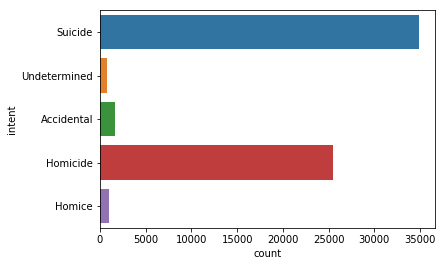

In [89]:
sns.countplot( data=df, y='intent')
plt.show()

#### Looks much better!! ...Now do the same for `race`

<br>

## <code style="color:steelblue">'race'</code>

**Display the class distribution for the <code style="color:steelblue">'race'</code> feature.**

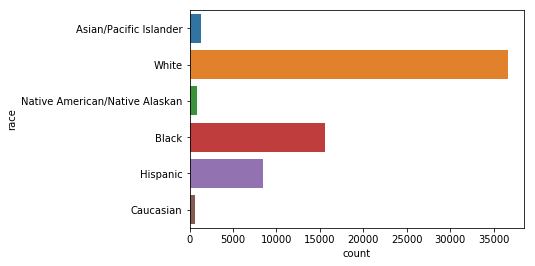

In [90]:
sns.countplot( data=df, y='race')
plt.show()

**Caucasian should be White**

In [91]:
df['race'] = df['race'].replace('Caucasian', 'White')

**Re- Display the class distribution for the <code style="color:steelblue">'race'</code> feature.**

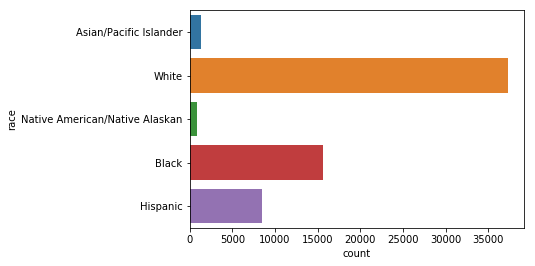

In [92]:
sns.countplot( data=df, y='race')
plt.show()

<br>

## C. Label missing categorical data

It's finally time to address missing data.

<br>
First, find and count the missing categorical data.

**Display number of missing values by feature (categorical)**

In [95]:
df.select_dtypes(include=['object']).isnull().sum()

intent       1
sex          0
race         0
place     1314
dtype: int64

**Fill missing categorical values, usaully with string 'Missing'**

Hint: Is there a way to loop through all categorical columns??

In [99]:
# NOT Working ==> working but need to set equal to data deries df['name'] = 
df.select_dtypes(include=['object']).fillna("Missing").head()

,intent,sex,race,place
0,Suicide,M,Asian/Pacific Islander,Home
1,Suicide,F,White,Street
2,Suicide,M,White,Other specified
3,Suicide,M,White,Home
4,Suicide,M,White,Other specified


In [103]:
for cat_series in df.select_dtypes(include=['object']):
    print(cat_series)
    df[cat_series] = df[cat_series].fillna("Missing")

intent
sex
race
place


**Re-Display number of missing values by feature (categorical)**

In [104]:
df.select_dtypes(include=['object']).isnull().sum()

intent    0
sex       0
race      0
place     0
dtype: int64

<br>

# D. Flag and fill missing numeric data

Finally, let's flag and fill missing numeric data.

<br>
First, let's find and count missing values in numerical feature.

**Hint:** You'll need to:
1. Select obsdervations by dtype - what parameter should we use?
2. Convert dataframe to a null dataframe - what cells are null?
3. Count up all cells with null values
4. Result should be a series where the rows are the different column names and the values will be the # of null observations in each column.

**Display number of missing values by feature (numeric)**

In [126]:
df.select_dtypes(include = ['object']).isnull().sum()

intent    0
sex       0
race      0
place     0
dtype: int64

<br>

## <code style="color:steelblue">'education'</code>

Let's take a look at the unique values for education to see if we should replace null values or drop the observations. Reference the schema above for education definitions.

**Display Unique Values of <code style="color:steelblue">'education'</code>**

In [107]:
df['education'].value_counts(dropna=False)

2.0    23787
1.0    15657
3.0    14296
4.0     8546
5.0     1331
NaN       52
Name: education, dtype: int64

**Fill missing numerical values**

In [109]:
df['education'] = df['education'].fillna(5)

**Re-Display number of missing values by feature (numerical)**

In [122]:
df['education'].value_counts(dropna=False)

2.0    23787
1.0    15657
3.0    14296
4.0     8546
5.0     1383
Name: education, dtype: int64

**Great, looks like you've taken care of education. Now handle the <code style="color:steelblue">'age'</code> missing values...**

<br>

## <code style="color:steelblue">'age'</code>

**Drop all rows where there is a missing <code style="color:steelblue">'age'</code> value**

Code provided as we haven't done this in previous lessons.

In [130]:
df.select_dtypes(exclude='object').isnull().sum()

year         0
month        0
police       0
age          0
hispanic     0
education    0
dtype: int64

In [129]:
df = df.dropna( axis=0, subset=['age'])

**Display number of missing values by feature (numeric)**

In [127]:
df.select_dtypes(exclude='object').isnull().sum()

year          0
month         0
police        0
age          14
hispanic      0
education     0
dtype: int64

**Print shape of dataframe**

Do you understand why the shape is different now than at the beginning of this exercise?

In [132]:
df.shape

(63655, 10)

<br>

### For readability and concistency - capitalizing column names and name the index
Code provided as we haven't done this in previous lessons.

##### An example of how the `map` function is works!

In [133]:
what = ['hello','what']

In [135]:
what = map(str.capitalize, what)
print(list(what))

['Hello', 'What']


<br>

You can think of it almost like the distributive property from 7th grade Algebra. 
Whatever is to the left of the comma: in this case the function `A`, gets applied to EVERY 
element of the iterable (list), to the right of the comma: `map(A, [a,b,c])`

In [59]:
list(map(str.capitalize, ["hi","mom","idk"]))

['Hi', 'Mom', 'Idk']

<br>

#### Rename Index and Capitalize all Column Names

In [136]:
df.index.name = 'Index'
df.columns = map(str.capitalize, df.columns)

**Print head**

In [137]:
df.head()

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


**Save your cleaned data for later use!**

In [139]:
df.to_csv('../../data/gun_casualities_excercise')